# 📒 U.S. Medical Insurance Costs – Data Analysis Project

## 🧭 Project Overview
This analysis explores how various factors influence medical insurance costs in the U.S. Using Python, we will investigate trends based on smoking status, age, and number of children.

**Questions we’ll explore:**
- How does smoking affect medical insurance charges?  
- Are older individuals charged more than younger ones?  
- Do families with children pay more on average?


In [13]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')
%matplotlib inline

In [14]:
# Load dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
# General info: column names, data types, nulls
df.info()

# Descriptive statistics
df.describe()

# Check for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1

In [19]:
# Drop duplicate row
df.drop_duplicates(inplace=True)

# Confirm shape after removing duplicates
df.shape

(1337, 7)

## 🔧 Variable Setup for Analysis

To simplify analysis, I’ve split the dataset into logical groups based on each question:

- Smokers vs. Non-Smokers  
- Older vs. Younger (based on median age)  
- Families with children vs. those without  


In [ ]:
# Create separate DataFrames for smokers and non-smokers
smokers = df[df['smoker'] == 'yes']
nonsmokers = df[df['smoker'] == 'no']


In [ ]:
# Find the median age
median_age = df['age'].median()

# Create two groups
younger = df[df['age'] < median_age]
older = df[df['age'] >= median_age]


In [22]:
# Families with at least one child
with_children = df[df['children'] > 0]

# Individuals with no children
no_children = df[df['children'] == 0]


## 📊 Question 1: How Does Smoking Affect Medical Insurance Charges?

We will analyze the average charges between smokers and non-smokers and visualize the difference using a boxplot. A custom function will summarize the key statistics and show the percentage difference in charges.


In [25]:
def analyze_smoking_impact(data):
    # Group by smoker status and calculate mean charges
    avg_charges = data.groupby('smoker')['charges'].mean()
    
    smoker_charge = avg_charges['yes']
    non_smoker_charge = avg_charges['no']
    diff_percent = ((smoker_charge - non_smoker_charge) / non_smoker_charge) * 100

    print("🔍 Average Charges:")
    print(f"  • Smokers     : ${smoker_charge:.2f}")
    print(f"  • Non-Smokers : ${non_smoker_charge:.2f}")
    print(f"\n📊 On average, smokers pay {diff_percent:.2f}% more in medical charges than non-smokers.")

    # Plot the distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x='smoker', y='charges', palette='Set2')
    plt.title('Medical Charges by Smoking Status')
    plt.xlabel('Smoker')
    plt.ylabel('Charges ($)')
    plt.show()


🔍 Average Charges:
  • Smokers     : $32050.23
  • Non-Smokers : $8440.66

📊 On average, smokers pay 279.71% more in medical charges than non-smokers.


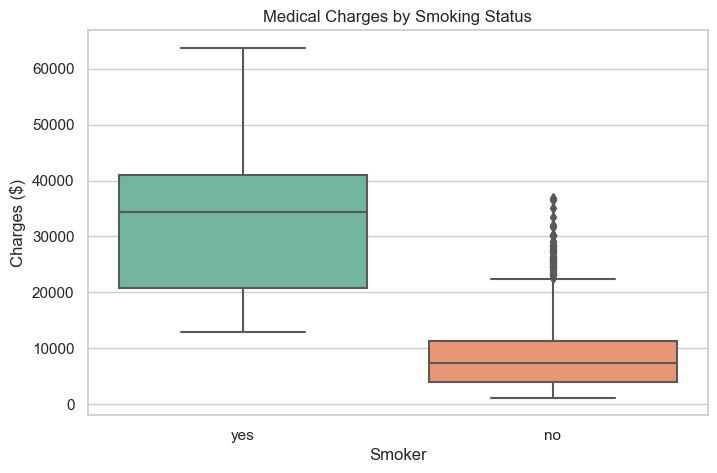

In [27]:
analyze_smoking_impact(df)


## 📊 Question 2: Are Older Individuals Charged More Than Younger Ones?

We will analyze how medical insurance charges change with age. By comparing individuals below and above the median age, and plotting the age distribution with charges, we aim to understand how age affects cost.


In [30]:
def analyze_age_impact(data):
    # Calculate median age
    median_age = data['age'].median()
    
    # Create age groups
    younger = data[data['age'] < median_age]
    older = data[data['age'] >= median_age]
    
    # Average charges
    younger_avg = younger['charges'].mean()
    older_avg = older['charges'].mean()
    diff_percent = ((older_avg - younger_avg) / younger_avg) * 100

    print("🔍 Average Charges by Age Group:")
    print(f"  • Younger (<{median_age}): ${younger_avg:.2f}")
    print(f"  • Older (≥{median_age}) : ${older_avg:.2f}")
    print(f"\n📊 On average, older individuals pay {diff_percent:.2f}% more than younger ones.")

    # Plot age vs charges
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='age', y='charges', hue='smoker', palette='coolwarm', alpha=0.6)
    plt.title('Medical Charges by Age (Colored by Smoking Status)')
    plt.xlabel('Age')
    plt.ylabel('Charges ($)')
    plt.legend(title='Smoker')
    plt.show()


🔍 Average Charges by Age Group:
  • Younger (<39.0): $10107.82
  • Older (≥39.0) : $16261.71

📊 On average, older individuals pay 60.88% more than younger ones.


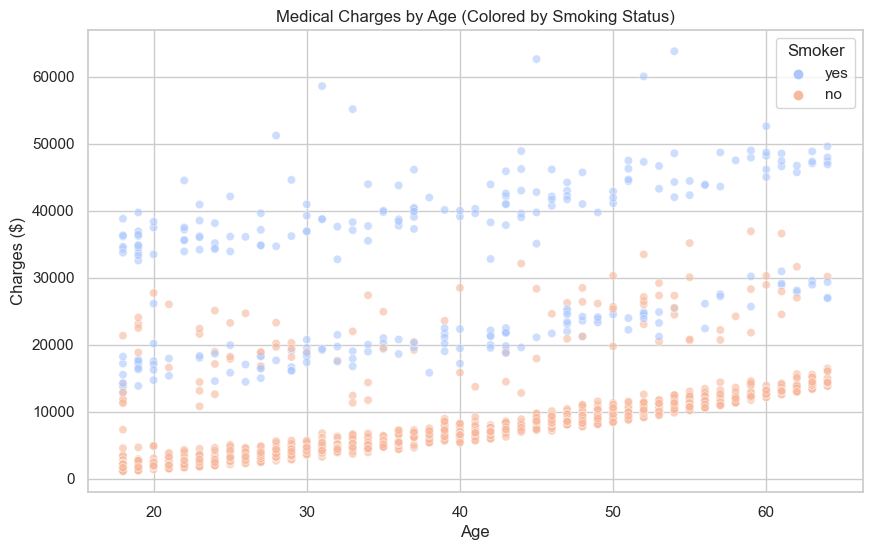

In [32]:
analyze_age_impact(df)


## 📊 Question 3: Do Families with Children Pay More on Average?

This section compares average medical charges between individuals with children and those without. We also visualize the full range of charges across different family sizes to better understand any trends.


In [35]:
def analyze_children_impact(data):
    # Split groups
    with_children = data[data['children'] > 0]
    no_children = data[data['children'] == 0]
    
    # Averages
    avg_with = with_children['charges'].mean()
    avg_without = no_children['charges'].mean()
    diff_percent = ((avg_with - avg_without) / avg_without) * 100

    print("🔍 Average Charges by Parental Status:")
    print(f"  • With Children    : ${avg_with:.2f}")
    print(f"  • Without Children : ${avg_without:.2f}")
    print(f"\n📊 On average, individuals with children pay {diff_percent:.2f}% more than those without children.")

    # Plot by number of children
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='children', y='charges', palette='viridis')
    plt.title('Medical Charges by Number of Children')
    plt.xlabel('Number of Children')
    plt.ylabel('Charges ($)')
    plt.show()


🔍 Average Charges by Parental Status:
  • With Children    : $13949.94
  • Without Children : $12384.70

📊 On average, individuals with children pay 12.64% more than those without children.


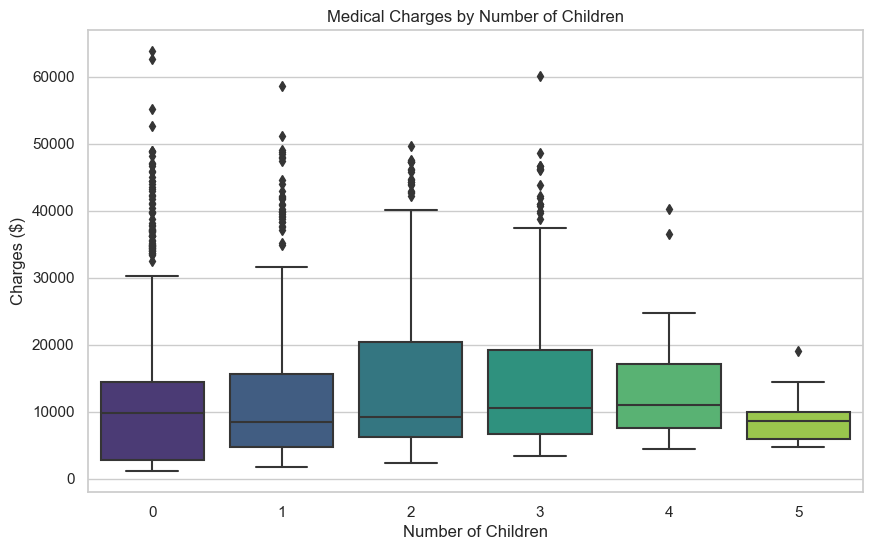

In [37]:
analyze_children_impact(df)


# ✅ Conclusion

This analysis of the U.S. Medical Insurance dataset explored how individual lifestyle and demographic factors affect insurance charges. By focusing on **smoking status**, **age**, and **number of children**, we uncovered clear patterns in the data:

---

### 🔥 1. Smoking Has the Strongest Financial Impact  
- **Smokers** are charged an average of **$32,050.23**, while **non-smokers** are charged **$8,440.66**.
- 📈 **Smokers pay 279.71% more** in medical charges on average.
- This sharp increase likely reflects higher health risks associated with smoking.

---

### 👵 2. Age Influences Charges Significantly  
- Individuals **39 and older** pay an average of **$16,261.71**, compared to **$10,107.82** for those under 39.
- 🧓 **Older individuals pay 60.88% more** than younger ones.
- This supports the assumption that medical needs and costs increase with age.

---

### 👶 3. Having Children Slightly Increases Costs  
- Individuals **with children** pay **$13,949.94** on average, compared to **$12,384.70** for those without.
- 👨‍👩‍👧‍👦 Families pay **12.64% more**, possibly due to expanded coverage needs or higher utilization of healthcare services.

---

### 📌 Final Thoughts  
These insights highlight how behavioral and demographic factors play a critical role in healthcare costs. Understanding these patterns can help insurers assess risk more fairly—and help individuals make informed decisions about their lifestyle and coverage options.

---

